# Welcome to digital recognizer with using CNN

**I would really appreciate your votes if you liked this notebook!**

*First we need import all required libraries*

In [1]:
import math
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam as Adam
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.losses import CategoricalCrossentropy as CC
from tensorflow.keras.losses import SparseCategoricalCrossentropy as SCC
import tensorflow as tf
from tensorflow.python.framework import ops


%matplotlib inline

# Load the data

In [2]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Processing the data

## Data separation

In [4]:
X_train = train.iloc[:,1:]
Y_train = train.iloc[:,0]

print(X_train.shape, ', ', Y_train.shape)

(42000, 784) ,  (42000,)


## Data normalization

In [5]:
X_train = X_train/255
test = test/255

print(X_train.shape, ', ', test.shape)

(42000, 784) ,  (28000, 784)


## Data reshaping

*To process the data we need to reshape 784 pixels of each entry into (28, 28, 1)*

In [6]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

print(X_train.shape,', ', test.shape)

(42000, 28, 28, 1) ,  (28000, 28, 28, 1)


## Data splitting

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.2)

*Here we look at the examples of each digit*

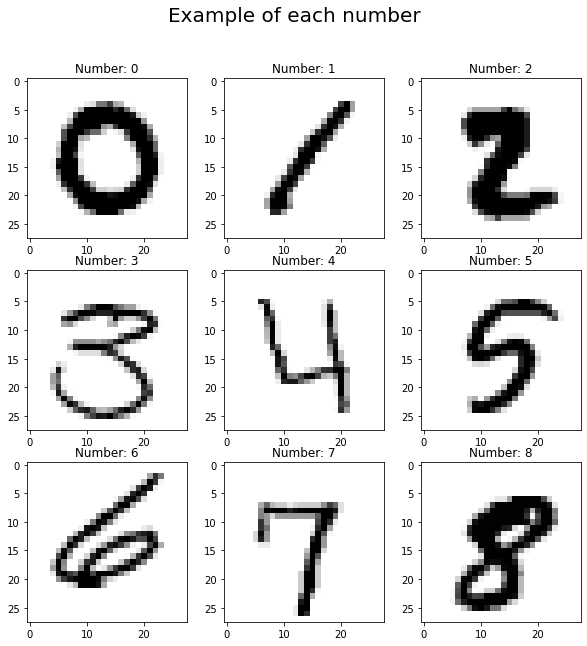

In [8]:
fig, ax = plt.subplots(3,3,figsize=(10,10))
fig.suptitle('Example of each number', size = 20)
nums, x = range(10), 0
for i in range(3):
    for j in range(3):
        label = nums[x]
        numbers_pixels = train[train['label'] == label]
        img = numbers_pixels.iloc[0,1:].values
        img = img.reshape((28,28))
        ax[i][j].imshow(img, cmap = plt.cm.binary)
        ax[i][j].set_title("Number: " + str(label))
        x += 1

# Initial model

*This is a model with 11 layers such as convolutional layer, pooling layer, flatten layer and fully-connected(dense) layer. Final layer will make a predictions*

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
BatchNormalization(axis = -1)
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = "valid"))
BatchNormalization(axis = -1)         
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
BatchNormalization(axis = -1)
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = "valid"))
model.add(Flatten())
BatchNormalization(axis = -1)         
model.add(Dense(512, activation = 'relu'))
BatchNormalization(axis = -1)
model.add(Dropout(0.2))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

## Compile the model

*We can use different optimizers such as Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl. In this model we use Adam optimizer*

In [10]:
opt = Adam()
model.compile(optimizer = opt, loss = SCC(), metrics = ['accuracy'])

*Using the method ```summary()``` we can see layers' types, output shape and amount of parameters*

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

## Fit the model

In [12]:
model.fit(X_train, Y_train, batch_size = 32, epochs = 15, validation_data = (X_test, Y_test))

Epoch 1/15
1050/1050 [==============================] - 46s 44ms/step - loss: 0.1684 - accuracy: 0.9459 - val_loss: 0.0685 - val_accuracy: 0.9792
Epoch 2/15
1050/1050 [==============================] - 46s 44ms/step - loss: 0.0542 - accuracy: 0.9838 - val_loss: 0.1019 - val_accuracy: 0.9710
Epoch 3/15
1050/1050 [==============================] - 46s 44ms/step - loss: 0.0365 - accuracy: 0.9886 - val_loss: 0.0498 - val_accuracy: 0.9868
Epoch 4/15
1050/1050 [==============================] - 46s 44ms/step - loss: 0.0304 - accuracy: 0.9911 - val_loss: 0.0488 - val_accuracy: 0.9869
Epoch 5/15
1050/1050 [==============================] - 46s 44ms/step - loss: 0.0270 - accuracy: 0.9921 - val_loss: 0.0507 - val_accuracy: 0.9873
Epoch 6/15
1050/1050 [==============================] - 46s 44ms/step - loss: 0.0208 - accuracy: 0.9935 - val_loss: 0.0534 - val_accuracy: 0.9874
Epoch 7/15
1050/1050 [==============================] - 47s 44ms/step - loss: 0.0182 - accuracy: 0.9944 - val_loss: 0.0434 -

## Predictions and accuracy

*Generate predictions on the test data using `predict()`*

In [13]:
probabilities = model.predict(test)
y_pred = np.argmax(probabilities, axis=1)
print(y_pred.shape)

(28000,)


*We evaluate the model on the train data via evaluate()*

In [14]:
print("Evaluate on test data")
results = model.evaluate(X_train, Y_train, batch_size=64)
print('Test loss: ', results[0],', test accuracy: ', results[1])

Evaluate on test data
525/525 [==============================] - 10s 19ms/step - loss: 0.0032 - accuracy: 0.9991
Test loss:  0.003161886241286993 , test accuracy:  0.9991369247436523


*Here we can look how good our model works on the test data*

In [15]:
print("Evaluate on test data")
results = model.evaluate(X_test, Y_test, batch_size=64)
print('Test loss: ', results[0],', test accuracy: ', results[1])

Evaluate on test data
132/132 [==============================] - 2s 18ms/step - loss: 0.0524 - accuracy: 0.9906
Test loss:  0.052427299320697784 , test accuracy:  0.9905952215194702


# Initial submission

In [16]:
submission = pd.DataFrame({'ImageId': np.arange(1, 28001), 'Label': y_pred})
submission.to_csv("submission.csv", index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
